<div style="border: none; margin: 5px 0; border-top: 1px dashed #FFFFFF; border-bottom: 1px dashed #FFFFFF; height: 5px;"></div>

<h2 style="color: #FFA07A;">3. Aplicação de algoritmos não supervisionados para seleção do número de agrupamentos (<i>Clusters</i>)</h2>

In [1]:
#
import ipywidgets as widgets
import time
from IPython.display import display

# --- Criar um aplicativo HTML para exibir o efeito de escrita ---
output = widgets.HTML(value="<div></div>")
display(output)

# --- Texto formatado para o efeito de escrita ---
texto = """
<div style="background-color: #FFFFFF; color: #333333; padding: 15px; 
            border-left: 5px solid #FFA500; font-family: Arial, sans-serif; 
            text-align: justify; font-size: 16px; line-height: 1.6;">

    <b>Após a análise inicial dos dados, passamos agora à fase de segmentação, usando algoritmos de <i>clustering</i> (agrupamento).</b> 

    <p><b>Mas antes, é importante perceber alguns conceitos:</b></p>
    <p>🔸 A <b>autocorrelação espacial</b> indica se áreas próximas têm valores semelhantes ou diferentes em relação a algo que estamos a estudar (como o acesso a serviços).</p>
    <p>🔸 Está relacionada com a <b>1.ª Lei da Geografia</b>, de Tobler: <i>“Elementos próximos tendem a ser mais parecidos.”</i></p>
    <p>🔸 Se locais próximos têm <b>valores semelhantes</b>, dizemos que há autocorrelação <b>positiva</b> (formam grupos). Se forem <b>diferentes</b>, é <b>negativa</b> (há dispersão).</p>
    <p>🔸 A autocorrelação pode ir de <b>-1 a +1</b>. Um valor de <i>p</i> pequeno (por exemplo, &lt; 0,05) mostra que esse padrão não é por acaso — é estatisticamente relevante.</p>
    
    <p><b>O que é o agrupamento (<i>clustering</i>)?</b></p> 
    <p>🔸 É uma forma de dividir os dados em grupos (<i>clusters</i>), juntando os que são parecidos entre si.</p> 
    <p>🔸 Vamos testar três métodos: <b>K-means</b>, <b>Modelo de Mistura Gaussiana (GMM)</b> e <b>Agglomerative Clustering</b>, para ver como cada um forma os grupos.</p> 
    <p>🔸 O <b>K-means</b> é rápido e funciona bem quando os grupos estão bem separados. O <b>GMM</b> permite alguma mistura entre grupos. O <b>Agglomerative</b> é bom quando há uma relação de hierarquia.</p> 
    <p>🔸 No final, vamos comparar os métodos com base em métricas de qualidade.</p> 
    
    <p><b>Métricas usadas:</b></p>
    <ul> 
        <li><b>Silhouette Score</b>: mede o quão bem cada ponto está dentro do seu grupo. Vai de <b>-1 a 1</b>. Quanto mais perto de <b>1</b>, melhor. Valores perto de <b>0</b> ou negativos mostram que os grupos estão mal definidos ou sobrepostos.</li> 
        <li><b>Índice de Calinski-Harabasz</b>: mede o quão separados estão os grupos e quão compactos são por dentro. <b>Quanto maior o valor, melhor.</b></li> 
    </ul> 

    <p>🔸 Para decidir o número ideal de grupos, usamos o <b>Método do Cotovelo</b> (<i>Elbow Method</i>). Este método olha para a <b>inércia</b>, ou seja, a soma das distâncias entre os pontos e o centro do seu grupo. Quando adicionar mais grupos deixa de melhorar muito a inércia, chegamos ao “cotovelo” — esse é o número ideal.</p> 

    <p><b>Métricas adicionais (GMM):</b></p>
    <ul> 
        <li><b>AIC (Critério de Informação de Akaike)</b>: ajuda a escolher o melhor número de grupos, equilibrando a qualidade do modelo com a sua simplicidade. Valores mais baixos indicam modelos melhores. Penaliza modelos com grupos a mais.</li> 
        <li><b>BIC (Critério de Informação Bayesiano)</b>: semelhante ao AIC, mas é mais exigente com a complexidade. Também prefere modelos com menor valor. Quanto mais baixo o BIC, melhor o modelo explica os dados sem exagerar no número de grupos.</li> 
    </ul>

    <p>🔸 Estas duas métricas são úteis quando usamos o GMM, porque este modelo é baseado em probabilidades. Ajudam a perceber quando estamos a usar grupos a mais ou a menos.</p>

    <p>🔸 Também mostramos gráficos em 2D que ajudam a ver como cada algoritmo agrupou os dados, tornando mais fácil a comparação entre eles.</p> 
</div>
"""
# --- Efeito de escrita carácter a carácter (mantém o HTML) ---
typed_text = ""
for char in texto:
    typed_text += char
    output.value = typed_text
    time.sleep(0.005) # Ajustar velocidade

# --- Garantir que o texto completo é exibido no final ---
output.value = typed_text

HTML(value='<div></div>')

In [2]:
from IPython.display import Javascript, display
# hide-me
display(Javascript('window.cellVisibilityManager.hideCells();'))

# --- Importar bibliotecas ---
ipython = get_ipython()
ipython.run_line_magic("run", "1.preparacao_bibliotecas.ipynb")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[INFO] Número ideal de clusters determinado: 2                                  


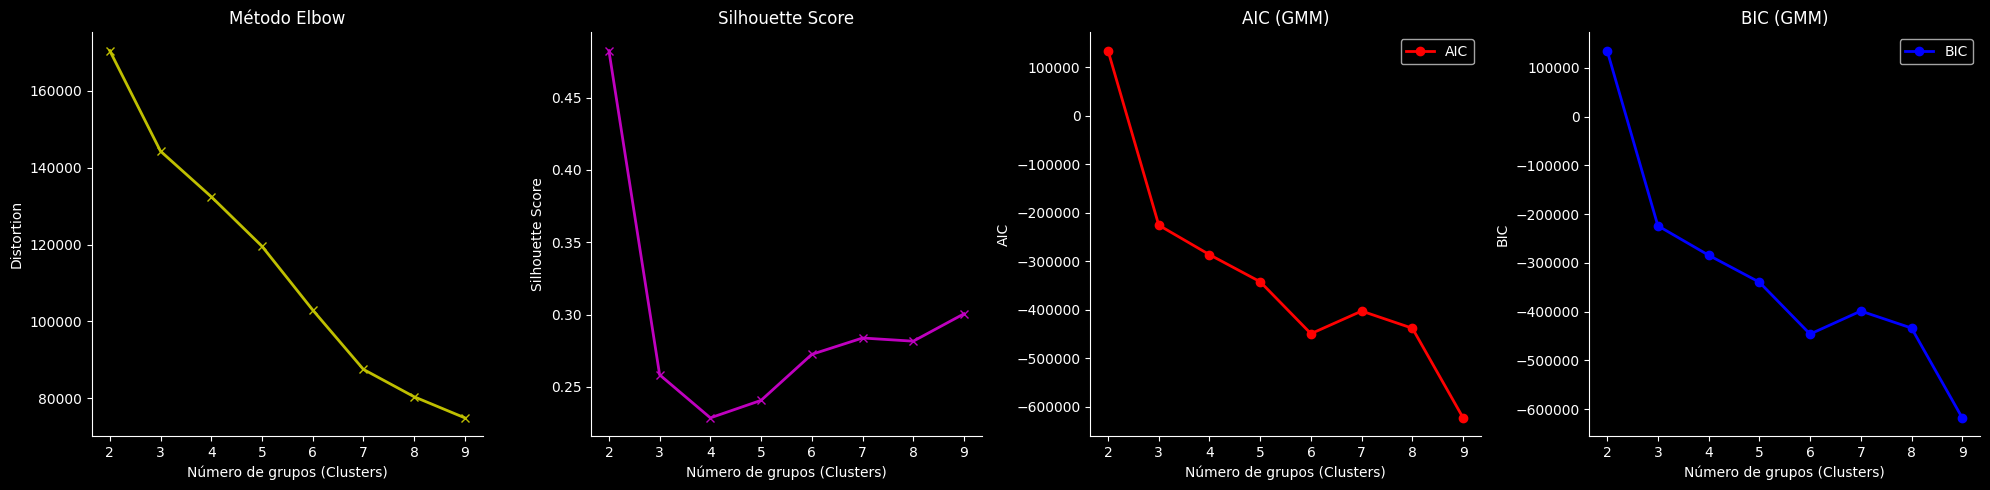

                                                                                
[INFO] Dados calculados com sucesso, a exibir métricas e gráficos...


=== KMeans ===
Silhouette Score: 0.483
Inércia: 170463.254
Calinski-Harabasz Index: 27720.987
Davies-Bouldin Index: 0.838

=== GMM ===
Silhouette Score: 0.476
Calinski-Harabasz Index: 25817.242
Davies-Bouldin Index: 0.820

=== Agglomerative Clustering ===
Silhouette Score: 0.481
Calinski-Harabasz Index: 27463.303
Davies-Bouldin Index: 0.845


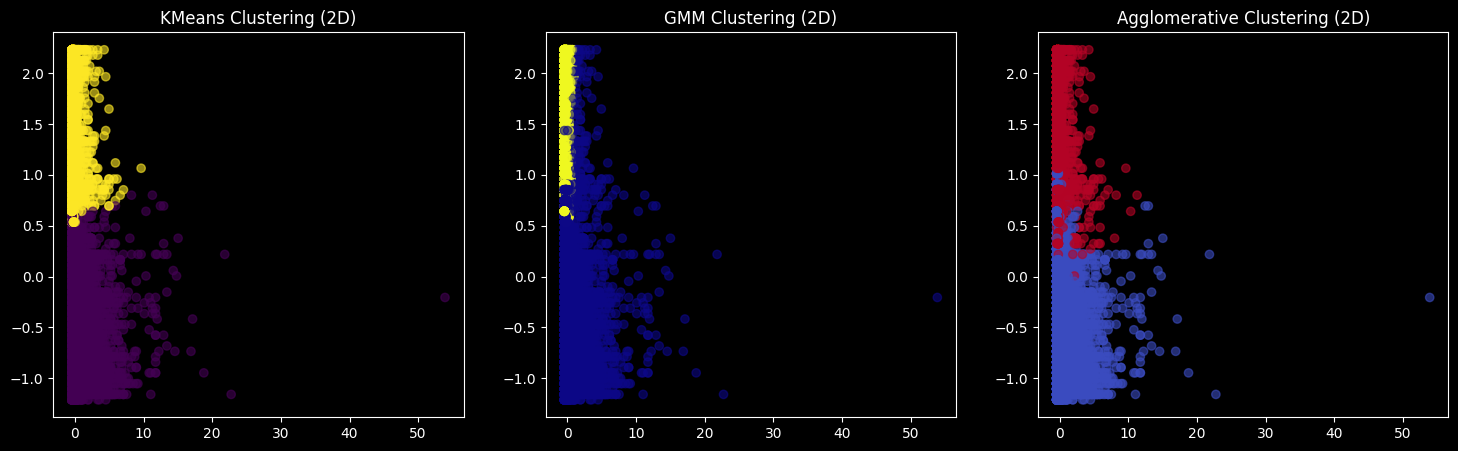

[INFO] Após análise, pode continuar.


In [3]:
# hide-me
display(Javascript('window.cellVisibilityManager.hideCells();'))

# --- Carregar e preparar os dados ---
def limpar_linha():
    sys.stdout.write('\r' + ' ' * 80 + '\r')
    sys.stdout.flush()

import warnings
warnings.filterwarnings("ignore", message="The weights matrix is not fully connected", module="libpysal.weights.distance")

# --- Carregar os dados ---
input_pkl_path = "df_servicos.pkl"
with open(input_pkl_path, 'rb') as pkl_file:
    data = pickle.load(pkl_file)

df_servicos = data 

# --- Definir as variáveis a utilizar ---
features = [
    'pop_64_mais', 'numero_servicos_proximos', 'distancia_media_servicos',
    'Centro Saude', 'Farmacias', 'Hospitais', 
    'Supermercados', 'Bancos', 'Parques e jardins', 'CTT'
]

# Manter a coluna de geometria
columns_to_keep = features + ['geometry']

# Remover linhas com valores em falta
df_servicos = df_servicos.dropna(subset=features)

# Normalizar os dados
scaler = StandardScaler()
X = scaler.fit_transform(df_servicos[features])

# Mensagem temporária de estado
sys.stdout.write("[INFO] A calcular agrupamentos (clusters), por favor aguarde...\r")
sys.stdout.flush()

# --- Agrupamento (clustering) e métricas de avaliação ---
# Definir o número máximo de grupos a testar
max_clusters = 10
distortions = []
silhouette_scores = []
aic_values, bic_values = [], []

# Avaliar agrupamento para diferentes números de grupos
for k in range(2, max_clusters):
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    
    # Modelo de Mistura Gaussiana (GMM)
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X)
    aic_values.append(gmm.aic(X))
    bic_values.append(gmm.bic(X))

# Escolher dinamicamente o número ótimo de grupos com base no maior Silhouette Score
optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
limpar_linha()
print(f"[INFO] Número ideal de agrupamentos determinado: {optimal_clusters}")

# Definir estilo escuro para os gráficos
plt.style.use('dark_background')
fig, ax = plt.subplots(1, 4, figsize=(20, 5))

# Configurar os contornos dos eixos a branco
for axis in ax:
    axis.spines['top'].set_visible(False)
    axis.spines['right'].set_visible(False)
    axis.spines['left'].set_color('white')
    axis.spines['bottom'].set_color('white')

# Gráfico do Método do Cotovelo
ax[0].plot(range(2, max_clusters), distortions, 'yx-', linewidth=2)
ax[0].set_title('Método Elbow', color='white')
ax[0].set_xlabel('Número de grupos (Clusters)', color='white')
ax[0].set_ylabel('Distortion', color='white')
ax[0].tick_params(axis='both', colors='white')

# Gráfico do Silhouette Score
ax[1].plot(range(2, max_clusters), silhouette_scores, 'mx-', linewidth=2)
ax[1].set_title('Silhouette Score', color='white')
ax[1].set_xlabel('Número de grupos (Clusters)', color='white')
ax[1].set_ylabel('Silhouette Score', color='white')
ax[1].tick_params(axis='both', colors='white')

# Gráfico AIC
ax[2].plot(range(2, max_clusters), aic_values, 'r-o', linewidth=2, label='AIC')
ax[2].set_title('AIC (GMM)', color='white')
ax[2].set_xlabel('Número de grupos (Clusters)', color='white')
ax[2].set_ylabel('AIC', color='white')
ax[2].tick_params(axis='both', colors='white')
ax[2].legend()

# Gráfico BIC
ax[3].plot(range(2, max_clusters), bic_values, 'b-o', linewidth=2, label='BIC')
ax[3].set_title('BIC (GMM)', color='white')
ax[3].set_xlabel('Número de grupos (Clusters)', color='white')
ax[3].set_ylabel('BIC', color='white')
ax[3].tick_params(axis='both', colors='white')
ax[3].legend()

plt.tight_layout()
plt.show()

# --- Executar o agrupamento final com o número ótimo de grupos ---
n_clusters = optimal_clusters
print(f"[INFO] A iniciar cálculos para {n_clusters} agrupamentos (clusters)...", end='\r', flush=True)

# === K-means ===
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_servicos['cluster_kmeans'] = kmeans.fit_predict(X)

# Obter centroides do K-means
centroides = kmeans.cluster_centers_

# === Modelo de Mistura Gaussiana (GMM) ===
gmm = GaussianMixture(n_components=n_clusters, random_state=42)
df_servicos['cluster_gmm'] = gmm.fit_predict(X)

# === Agglomerative Clustering ===
agglo = AgglomerativeClustering(n_clusters=n_clusters)
df_servicos['cluster_agglo'] = agglo.fit_predict(X)

# --- Calcular métricas para cada algoritmo de clustering ---
# K-means
silhouette_kmeans = silhouette_score(X, df_servicos['cluster_kmeans'])
inercia_kmeans = kmeans.inertia_
calinski_kmeans = calinski_harabasz_score(X, df_servicos['cluster_kmeans'])

# GMM
silhouette_gmm = silhouette_score(X, df_servicos['cluster_gmm'])
calinski_gmm = calinski_harabasz_score(X, df_servicos['cluster_gmm'])

# Agglomerative Clustering
silhouette_agglo = silhouette_score(X, df_servicos['cluster_agglo'])
calinski_agglo = calinski_harabasz_score(X, df_servicos['cluster_agglo'])

# Calcular o Índice de Davies-Bouldin (DBI)
dbi_kmeans = davies_bouldin_score(X, df_servicos['cluster_kmeans'])
dbi_gmm = davies_bouldin_score(X, df_servicos['cluster_gmm'])
dbi_agglo = davies_bouldin_score(X, df_servicos['cluster_agglo'])

# Mensagem final após os cálculos
print(' ' * 80, end='\r')  # Ou usar clear_line() se for a função atualizada
print("\n[INFO] Dados calculados com sucesso, a exibir métricas e gráficos...\n")

# --- Apresentar métricas ---
print("\n=== K-means ===")
print(f"Silhouette Score: {silhouette_kmeans:.3f}")
print(f"Inércia: {inercia_kmeans:.3f}")
print(f"Calinski-Harabasz Index: {calinski_kmeans:.3f}")
print(f"Davies-Bouldin Index: {dbi_kmeans:.3f}")

print("\n=== GMM ===")
print(f"Silhouette Score: {silhouette_gmm:.3f}")
print(f"Calinski-Harabasz Index: {calinski_gmm:.3f}")
print(f"Davies-Bouldin Index: {dbi_gmm:.3f}")

print("\n=== Agglomerative Clustering ===")
print(f"Silhouette Score: {silhouette_agglo:.3f}")
print(f"Calinski-Harabasz Index: {calinski_agglo:.3f}")
print(f"Davies-Bouldin Index: {dbi_agglo:.3f}")

# --- Visualização final dos agrupamentos (projeções 2D) ---
kmeans_labels = df_servicos['cluster_kmeans']
gmm_labels = df_servicos['cluster_gmm']
agglo_labels = df_servicos['cluster_agglo']

plt.style.use('dark_background')
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

ax[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
ax[0].set_title("K-means Agrupamento (2D)")

ax[1].scatter(X[:, 0], X[:, 1], c=gmm_labels, cmap='plasma', alpha=0.6)
ax[1].set_title("GMM Agrupamento (2D)")

ax[2].scatter(X[:, 0], X[:, 1], c=agglo_labels, cmap='coolwarm', alpha=0.6)
ax[2].set_title("Agglomerative Agrupamento (2D)")

plt.show()

limpar_linha()

# --- Calcular o I de Moran e gerar gráficos de dispersão de Moran ---

# Garantir que o DataFrame é um GeoDataFrame
if not isinstance(df_servicos, gpd.GeoDataFrame):
    df_servicos = gpd.GeoDataFrame(df_servicos, geometry='geometry')

# Função para calcular o I de Moran e os dados do gráfico de dispersão
def compute_moran_scatter(gdf, column, k=8):
    w = KNN.from_dataframe(gdf, k=k)
    w.transform = 'R'
    vals = gdf[column].values.astype(float)
    moran = Moran(vals, w)
    
    z = (vals - np.mean(vals)) / np.std(vals)
    lag_z = w.sparse.dot(z)
    
    linha_x = np.linspace(z.min(), z.max(), 100)
    linha_y = linha_x * moran.I
    
    scatter_data = {
        "z": z,
        "z_lag": lag_z,
        "linha_x": linha_x,
        "linha_y": linha_y,
        "moran_I": moran.I,
        "p_value": moran.p_sim
    }
    return scatter_data

# Definir os nomes e cores dos modelos de clustering
model_labels = {
    "K-means": "cluster_kmeans",
    "GMM": "cluster_gmm",
    "Agglomerative": "cluster_agglo"
}
model_colors = {
    "K-means": "orange",
    "GMM": "purple",
    "Agglomerative": "green"
}

resultados = {}
for nome_modelo, col_cluster in model_labels.items():
    scatter = compute_moran_scatter(df_servicos, col_cluster, k=8)
    resultados[nome_modelo] = {
        "moran_scatter": scatter,
        "moran_I": scatter["moran_I"],
        "p_value": scatter["p_value"]
    }

# Criar gráfico com 3 colunas para os gráficos de dispersão de Moran
n_modelos = len(resultados)  
fig_moran = make_subplots(
    rows=1, 
    cols=n_modelos, 
    subplot_titles=list(resultados.keys()),
    column_widths=[0.3, 0.3, 0.3],
    horizontal_spacing=0.05
)

# Adicionar pontos e linhas de regressão para cada modelo
col_idx = 1
for nome, met in resultados.items():
    scatter = met["moran_scatter"]
    I = met["moran_I"]
    p = met["p_value"]
    
    line_color = model_colors.get(nome, "white")

    # Pontos do gráfico de dispersão
    fig_moran.add_trace(
        go.Scatter(
            x=scatter["z"],
            y=scatter["z_lag"],
            mode='markers',
            marker=dict(size=8),
            name=f"{nome} Observações"
        ),
        row=1, col=col_idx
    )
    
    # Linha de regressão com inclinação = I de Moran
    fig_moran.add_trace(
        go.Scatter(
            x=scatter["linha_x"],
            y=scatter["linha_y"],
            mode='lines',
            line=dict(color=line_color),
            name=f"{nome} (slope={I:.3f}, p={p:.4f})"
        ),
        row=1, col=col_idx
    )
    
    fig_moran.update_yaxes(title_text="Lag Z-Score", title_standoff=1, row=1, col=1)
    fig_moran.update_yaxes(title_text="Lag Z-Score", title_standoff=1, row=1, col=2)
    fig_moran.update_yaxes(title_text="Lag Z-Score", title_standoff=1, row=1, col=3)

    col_idx += 1

# Layout e exibir o gráfico
fig_moran.update_layout(
    width=1200,
    height=500,
    margin=dict(l=80, r=20, t=60, b=40),
    title='Gráficos de dispersão de Moran',
    template='plotly_dark',
    plot_bgcolor='#000000',
    paper_bgcolor='#000000'
)
fig_moran.show()

# --- Guardar o DataFrame final e as métricas em ficheiro .pkl ---

# Definir dicionário com métricas
metrics = {
    'K-means': {
        'Silhouette Score': silhouette_kmeans,
        'Inertia': inercia_kmeans,
        'Calinski-Harabasz Index': calinski_kmeans,
        'Davies-Bouldin Index': dbi_kmeans
    },
    'GMM': {
        'Silhouette Score': silhouette_gmm,
        'Calinski-Harabasz Index': calinski_gmm,
        'Davies-Bouldin Index': dbi_gmm
    },
    'Agglomerative': {
        'Silhouette Score': silhouette_agglo,
        'Calinski-Harabasz Index': calinski_agglo,
        'Davies-Bouldin Index': dbi_agglo
    }
}

# --- Guardar os resultados num ficheiro pickle ---
#output_pkl_path = "data.pkl"
#with open(output_pkl_path, 'wb') as pkl_file:
    #pickle.dump({'df': df_servicos[columns_to_keep + ['cluster_kmeans', 'cluster_gmm', 'cluster_agglo']], 'metrics': metrics}, pkl_file)

# --- Mensagem final ---
print("\033[92m[INFO] Após análise, pode continuar.\033[0m")

<div style="border: none; margin: 5px 0; border-top: 1px dashed #FFFFFF; border-bottom: 1px dashed #FFFFFF; height: 5px;"></div>

<h2 style="color: #FFA07A;">3.1. Visualização espacial dos agrupamentos (<i>clusters</i>)</h2>

In [6]:
#
import ipywidgets as widgets
import time
from IPython.display import display

# --- Criar um aplicativo HTML para apresentar o efeito de escrita ---
output = widgets.HTML(value="<div></div>")
display(output)

# --- Texto formatado ---
texto = """
<div style="background-color: #FFFFFF; color: #333333; padding: 15px; 
            border-left: 5px solid #FFA500; font-family: Arial, sans-serif; 
            text-align: justify; font-size: 16px; line-height: 1.6;">

    <p>🔸 No processo anterior, os algoritmos apresentaram resultados semelhantes. No entanto, a escolha de <b><u>2 clusters</u></b> é corroborada pelas métricas de avaliação, sugerindo a existência de dois grupos bem definidos nos dados.</p>

    <p>🔸 Para compreender a segmentação espacial, a próxima secção apresenta uma aplicação interativa que permite visualizar os <i>clusters</i> elaborados pelos três algoritmos de agrupamento (<b>K-means, GMM e Agglomerative Clustering</b>). No painel, poderá selecionar o algoritmo e a métrica de desempenho.</p>

    <p>🔸 Após a análise, responda à questão, tendo em conta que as variações na cor dos polígonos dos edifícios refletem o resultado do algoritmo de agrupamento. Quando um polígono de edifício apresenta uma cor diferente do restante <i>cluster</i>, isso indica que o algoritmo teve maior dificuldade em agrupar de forma correta os edifícios nessa área.</p>

</div>
"""

# --- Efeito de escrita carácter a carácter preservando o formato HTML ---
typed_text = ""
for char in texto:
    typed_text += char
    output.value = typed_text
    time.sleep(0.005)  # Controlo da velocidade de escrita

# --- Garantir que o texto final é totalmente exibido ---
output.value = typed_text

HTML(value='<div></div>')

In [7]:
# hide-me
display(Javascript('window.cellVisibilityManager.hideCells();'))

# --- Carregar o DataFrame e métricas do arquivo .pkl ---
input_pkl_path = "df_servicos_clusters.pkl"
with open(input_pkl_path, 'rb') as pkl_file:
    data = pickle.load(pkl_file)

df_servicos = data['df']  # DataFrame com clusters e variáveis
metrics = data['metrics']  # Métricas calculadas para os modelos

# --- Verificar a existência da coluna 'geometry' ---
if 'geometry' not in df_servicos.columns:
    raise KeyError("A coluna 'geometry' é obrigatória para criar o mapa interativo.")

# --- Inicializar o painel com estilos externos ---
external_stylesheets = ['https://fonts.googleapis.com/css2?family=Roboto:wght@300;400;500&display=swap']
app_map = Dash(__name__, external_stylesheets=external_stylesheets)

app_map.index_string = '''
<!DOCTYPE html>
<html>
<head>
    <title>Mapa Interativo</title>
    <style>
        body, html {
            margin: 0;
            padding: 0;
            width: 100%;
            height: 100%;
            background-color: #2b2b2b;
        }
        iframe {
            border: none;
        }
        /* ------ CUSTOMIZAÇÃO DO DROPDOWN DASH ------ */
        .Select-menu-outer, .Select-menu-list, .Select-menu {
            background-color: #000 !important;
            color: #fff !important;
        }
        .Select-option, .Select__option {
            background-color: #000 !important;
            color: #fff !important;
        }
        .Select-option.is-focused, .Select__option--is-focused {
            background-color: #333 !important;
        }
        .Select-control, .Select__control {
            background-color: #000 !important;
            color: #fff !important;
        }
    </style>
</head>
<body>
    {%app_entry%}
    <footer>
        {%config%}
        {%scripts%}
        {%renderer%}
    </footer>
</body>
</html>
'''

main_style = {
    'font-family': 'Roboto, sans-serif',
    'background-color': '#000',
    'color': 'white',
    'padding': '0',
    'margin': '0',
    'width': '100%',
    'box-sizing': 'border-box'
}

titulo_estilo = {
    'color': 'white',
    'background-color': '#000',
    'padding': '20px',
    'text-align': 'center',
    'font-size': '28px',
    'font-weight': '500',
    'border': '2px solid white',
    'border-radius': '10px',
    'margin-bottom': '20px',
    'box-shadow': '0px 4px 8px rgba(0, 0, 0, 0.2)'
}

container_estilo = {
    'display': 'flex',
    'justify-content': 'space-between',
    'align-items': 'center',
    'margin-bottom': '20px',
    'background-color': '#000',
    'padding': '15px',
    'border-radius': '10px',
    'box-shadow': '0px 4px 8px rgba(0, 0, 0, 0.2)'
}

component_style = {
    'background-color': '#000',
    'color': 'white',
    'border-radius': '5px',
    'border': '1px solid white',
    'width': '100%',
    'font-size': '16px'
}

# --- Apresentação do painel ---
app_map.layout = html.Div([
    html.H1("Visualização espacial dos agrupamentos", style=titulo_estilo),

    html.Div([
        # Dropdown do algoritmo
        html.Div([
            html.Label(
                "Selecione o Algoritmo de Agrupamento:",
                style={'color': 'white', 'margin-bottom': '1px'}
            ),
            dcc.Dropdown(
                id='model-dropdown',
                options=[
                    {'label': 'K-means', 'value': 'KMeans'},
                    {'label': 'Gaussian Mixture Model', 'value': 'GMM'},
                    {'label': 'Agglomerative Clustering', 'value': 'Agglomerative'}
                ],
                value='GMM',
                clearable=False,
                style=component_style     
            )
        ], style={'width': '30%', 'margin-right': '10px'}),

        html.Div([
            html.Label(
                "Selecione a Métrica para Exibir:",
                style={'color': 'white', 'margin-bottom': '1px'}
            ),
            dcc.Dropdown(
                id='metric-dropdown',
                options=[
                    {'label': 'Silhouette Score', 'value': 'silhouette'},
                    {'label': 'Calinski-Harabasz Index', 'value': 'calinski'}
                ],
                value='silhouette',
                clearable=False,
                style=component_style     # <- e aqui
            )
        ], style={'width': '30%', 'margin-right': '10px'}),

        html.Div([
            html.Label("Métrica Selecionada:", style={'color': 'white', 'margin-bottom': '1px'}),
            html.Div(id='metric-value', style={
                'color': 'white',
                'background-color': '#000',
                'border': '1px solid white',
                'border-radius': '8px',
                'padding': '8px',
                'font-size': '14px',
                'text-align': 'center',
                'width': '90%'
            })
        ], style={'width': '30%'})
    ], style=container_estilo),

    # --- Adicionado: área para mostrar o mapa interativo ---
    dcc.Loading([
        html.Iframe(
            id='mapa-interativo',
            srcDoc="",  
            style={
                "width": "100%",
                "height": "600px",
                "border": "2px solid white",
                "border-radius": "16px",
                "margin-top": "20px",
                "background-color": "#000"
            }
        )
    ])
], style=main_style)

# --- Função para criar o mapa interativo com 2 clusters ---
def criar_mapa_interativo(df, cluster_coluna):
    mapa = folium.Map(location=[41.1390, -8.6291], zoom_start=13, min_zoom=13, tiles="CartoDB dark_matter", control_scale=True)
    cluster_colors = ['#FF5733', '#33FF57']  #cores para os dois clusters

    for _, row in df.iterrows():
        poligono = row['geometry']
        cluster = row[cluster_coluna]
        cor = cluster_colors[cluster % len(cluster_colors)]

        tooltip_text = f"""
            Cluster: {cluster}<br>
            População 65+: {int(row['pop_64_mais'])}<br>
            Número de Serviços Próximos: {int(row['numero_servicos_proximos'])}<br>
            Distância Média aos Serviços: {int(row['distancia_media_servicos'])}m
        """

        folium.GeoJson(
            data=poligono,
            style_function=lambda x, color=cor: {'fillColor': color, 'color': '#333', 'weight': 0.5, 'fillOpacity': 0.6},
            tooltip=folium.Tooltip(tooltip_text)
        ).add_to(mapa)

    return mapa._repr_html_()

# --- Callback para atualizar o mapa e exibir a métrica ---
@app_map.callback(
    [Output('mapa-interativo', 'srcDoc'), Output('metric-value', 'children')],
    [Input('model-dropdown', 'value'), Input('metric-dropdown', 'value')]
)
def atualizar_mapa(model_name, metric_name):
    # seleciona a métrica
    if metric_name == 'silhouette':
        m = metrics[model_name]['Silhouette Score']
    else:
        m = metrics[model_name]['Calinski-Harabasz Index']
    metric_text = f"{metric_name.capitalize()}: {m:.3f}"

    # mapeia para a coluna certa
    model_to_col = {
        'KMeans'       : 'cluster_kmeans',
        'GMM'          : 'cluster_gmm',
        'Agglomerative': 'cluster_agglo'
    }
    cluster_coluna = model_to_col[model_name]

    mapa_html = criar_mapa_interativo(df_servicos, cluster_coluna)
    return mapa_html, metric_text

# --- Encontrar uma porta de rede livre para o painel interativo ---
def encontrar_porta_livre():
    while True:
        porta = random.randint(8000, 9000)
        with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:
            if s.connect_ex(("localhost", porta)) != 0:
                return porta

porta = encontrar_porta_livre()

# --- Lançar a aplicação interativa quando o ficheiro for executado ---
if __name__ == '__main__':
    app_map.run(debug=False, port=porta)

# ---- Mensagem final---
print("\033[92m[INFO] Após análise, pode continuar.\033[0m")

NameError: name 'Javascript' is not defined

<div style="border: none; margin: 5px 0; border-top: 1px dashed #FFFFFF; border-bottom: 1px dashed #FFFFFF; height: 5px;"></div>

In [8]:
import os
import pandas as pd
from datetime import datetime
from IPython.display import display, clear_output, Javascript
import ipywidgets as widgets

# hide-me
display(Javascript('window.cellVisibilityManager.hideCells();'))

# --- Definir a pasta onde serão guardadas as respostas ---
pasta_respostas = ".../respostas"
os.makedirs(pasta_respostas, exist_ok=True)

# --- Pergunta 1 com opções de escolha múltipla ---
pergunta1 = widgets.RadioButtons(
    options=[
        "a) K-means.",
        "b) Agglomerative Clustering.",
        "c) Gaussian Mixture Model (GMM).",
    ],
    description='Resposta:',
    layout=widgets.Layout(width='600px'),
    style={'description_width': 'initial'},
    value=None
)

# --- Pergunta 2 com opções de escolha múltipla ---
pergunta2 = widgets.RadioButtons(
    options=[
        "a) O K-means apresentou autocorrelação espacial significativa, com declive próximo de 1.",
        "b) O K-means apresentou um valor de p elevado, indicando ausência de autocorrelação.",
        "c) O K-means teve declive negativo, indicando dispersão espacial.",
    ],
    description='Resposta:',
    layout=widgets.Layout(width='700px'),
    style={'description_width': 'initial'},
    value=None
)

# --- Botão para gravar as respostas ---
botao_gravar = widgets.Button(description='Gravar respostas', button_style='info')
output = widgets.Output()

# --- Função para gravar as respostan num Excel ---
def gravar_resposta(b):
    resposta1 = pergunta1.value
    resposta2 = pergunta2.value

    if not resposta1 or not resposta2:
        with output:
            clear_output()
            print("Por favor, seleccione uma resposta para ambas as questões antes de gravar.")
        return

    dados = {
        "Resposta 1": [resposta1],
        "Resposta 2": [resposta2],
        "Data": [datetime.now().strftime("%Y-%m-%d %H:%M:%S")]
    }

    ficheiro = os.path.join(pasta_respostas, "respostas_clusters.xlsx")
    df = pd.DataFrame(dados)

    if not os.path.isfile(ficheiro):
        try:
            df.to_excel(ficheiro, index=False, engine='openpyxl')
            with output:
                clear_output()
                print(f"Ficheiro criado com sucesso em: {ficheiro}")
        except Exception as e:
            with output:
                clear_output()
                print(f"Erro ao criar o ficheiro: {e}")
    else:
        try:
            df_existente = pd.read_excel(ficheiro, engine='openpyxl')
            df_final = pd.concat([df_existente, df], ignore_index=True)
            df_final.to_excel(ficheiro, index=False, engine='openpyxl')
            with output:
                clear_output()
                print(f"Respostas adicionadas ao ficheiro {ficheiro}")
        except Exception as e:
            with output:
                clear_output()
                print(f"Erro ao ler ou gravar no ficheiro: {e}")

    with output:
        clear_output()
        print("Respostas gravadas com sucesso! Obrigado.")
        pergunta1.value = None
        pergunta2.value = None

botao_gravar.on_click(gravar_resposta)

# --- Apresentar as perguntas ao utilizador ---
display(widgets.HTML("""
<b style="font-size: 18px;">Por favor, responda às questões:</b><br><br>
<b style="font-size: 16px;">1. Com base no mapa, qual foi o algoritmo que obteve o melhor desempenho na definição das fronteiras dos agrupamentos (clusters)?</b><br>
"""))

display(pergunta1)

display(widgets.HTML("""
<br><b style="font-size: 16px;">2. Com base no gráfico de dispersão de Moran, relativo ao resultado do algoritmo K-Means, qual das afirmações descreve de forma correta o padrão espacial observado?</b><br>
"""))

display(pergunta2, botao_gravar, output)

<IPython.core.display.Javascript object>

HTML(value='\n<b style="font-size: 18px;">Por favor, responda às questões:</b><br><br>\n<b style="font-size: 1…

RadioButtons(description='Resposta:', layout=Layout(width='600px'), options=('a) KMeans.', 'b) Agglomerative C…

HTML(value='\n<br><b style="font-size: 16px;">2. Com base no gráfico de dispersão de Moran, relativo ao result…

RadioButtons(description='Resposta:', layout=Layout(width='700px'), options=('a) O K-Means apresentou autocorr…

Button(button_style='info', description='Gravar respostas', style=ButtonStyle())

Output()

<div style="border: none; margin: 5px 0; border-top: 1px dashed #FFFFFF; border-bottom: 1px dashed #FFFFFF; height: 5px;"></div>

Seguinte: [Visualização estatística dos agrupamentos do K-Means](4.ipynb)

<div style="border: none; margin: 5px 0; border-top: 1px dashed #FFFFFF; border-bottom: 1px dashed #FFFFFF; height: 5px;"></div>